<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Yapay_Zeka_ile_Hata_S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adım 2: Gerekli Kütüphaneleri Yükleme
İlk hücreye aşağıdaki kütüphaneleri ekleyelim:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Adım 3: Veri Setini Yükleme ve İnceleme
Örnek bir veri seti kullanabiliriz (örneğin, fabrika hata kayıtları). Siz kendi veri setinizi de yükleyebilirsiniz.

In [ ]:
# Örnek veri seti oluşturalım (siz kendi verinizi pd.read_csv() ile yükleyebilirsiniz)
data = {
    'Sıcaklık': [120, 150, 90, 110, 130, 140, 85, 100],
    'Basınç': [30, 45, 20, 35, 50, 40, 15, 25],
    'Nem': [60, 45, 70, 50, 35, 40, 75, 55],
    'Hata_Tipi': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)
print(df.head())

   Sıcaklık  Basınç  Nem Hata_Tipi
0       120      30   60         A
1       150      45   45         B
2        90      20   70         A
3       110      35   50         C
4       130      50   35         B


Adım 4: Veri Ön İşleme
Hata tiplerini sayısal değerlere dönüştürelim:

In [ ]:
le = LabelEncoder()
df['Hata_Tipi'] = le.fit_transform(df['Hata_Tipi'])
print(df.head())

   Sıcaklık  Basınç  Nem  Hata_Tipi
0       120      30   60          0
1       150      45   45          1
2        90      20   70          0
3       110      35   50          2
4       130      50   35          1


Adım 5: Eğitim ve Test Verisi Ayırma

In [ ]:
X = df.drop('Hata_Tipi', axis=1)
y = df['Hata_Tipi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Adım 6: Model Oluşturma ve Eğitme
Random Forest kullanalım:

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Adım 7: Model Değerlendirme


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



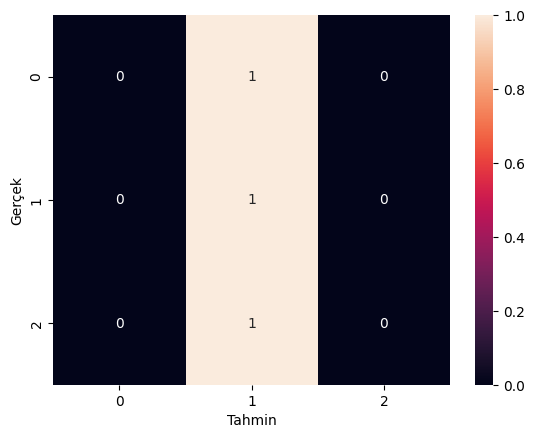

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

Adım 8: Yeni Veri ile Tahmin Yapma


In [ ]:
yeni_veri = [[125, 38, 55]]  # Örnek veri
tahmin = model.predict(yeni_veri)
print(f"Tahmin Edilen Hata Tipi: {le.inverse_transform(tahmin)[0]}")

Tahmin Edilen Hata Tipi: B


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


CNN (Evrişimli Sinir Ağları) ve LSTM (Uzun Kısa Vadeli Bellek) modellerini de ekleyerek daha karmaşık bir hata sınıflandırma projesi yapalım. İşte adım adım genişletilmiş rehber:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Derin Öğrenme Kütüphaneleri
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout
from tensorflow.keras.utils import to_categorical

2. Veri Seti Yükleme ve Ön İşleme
Örnek Veri Seti (Fabrika Sensör Verileri):

In [ ]:
# Örnek veri oluşturma (siz gerçek veri kullanabilirsiniz)
data = {
    'Sıcaklık': np.random.normal(100, 20, 1000),
    'Basınç': np.random.normal(50, 10, 1000),
    'Titreşim': np.random.normal(5, 2, 1000),
    'Hata_Tipi': np.random.choice(['A', 'B', 'C', 'D'], size=1000, p=[0.4, 0.3, 0.2, 0.1])
}
df = pd.DataFrame(data)

# Hata tiplerini sayısallaştırma
le = LabelEncoder()
df['Hata_Tipi'] = le.fit_transform(df['Hata_Tipi'])

Veriyi CNN/LSTM için Uygun Formata Getirme:


In [ ]:
# Özellikler ve Etiketler
X = df.drop('Hata_Tipi', axis=1).values
y = df['Hata_Tipi'].values

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CNN/LSTM için 3D boyutuna çevirme (Örnekler, Zaman Adımları, Özellikler)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# One-Hot Encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

3. CNN Modeli Oluşturma


In [ ]:
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train_cnn, y_train_cat, epochs=50, validation_data=(X_test_cnn, y_test_cat), verbose=1)

CNN Sonuçları:


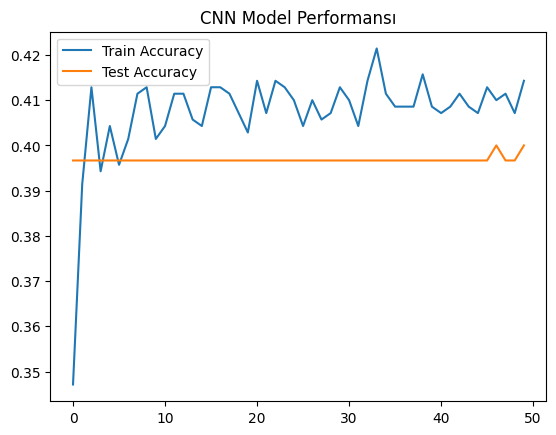

In [ ]:
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Test Accuracy')
plt.title('CNN Model Performansı')
plt.legend()
plt.show()

4. LSTM Modeli Oluşturma


In [ ]:
model_lstm = Sequential([
    LSTM(64, input_shape=(X_train_cnn.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(len(le.classes_), activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train_cnn, y_train_cat, epochs=50, validation_data=(X_test_cnn, y_test_cat), verbose=1)

LSTM Sonuçları:


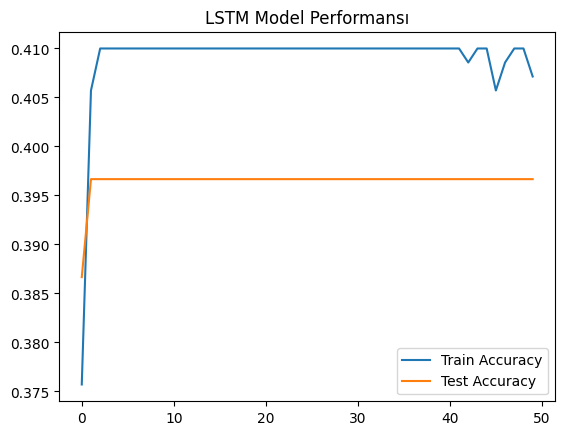

In [ ]:
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Test Accuracy')
plt.title('LSTM Model Performansı')
plt.legend()
plt.show()

5. Model Karşılaştırması


In [ ]:
# Test verisi üzerinde tahmin
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_lstm = model_lstm.predict(X_test_cnn)

# Sınıf etiketlerine çevirme
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

# Classification Report
print("CNN Sonuçları:\n", classification_report(y_test, y_pred_cnn))
print("LSTM Sonuçları:\n", classification_report(y_test, y_pred_lstm))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
CNN Sonuçları:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57       119
           1       0.33      0.01      0.02        97
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        26

    accuracy                           0.40       300
   macro avg       0.18      0.25      0.15       300
weighted avg       0.27      0.40      0.23       300

LSTM Sonuçları:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57       119
           1       0.00      0.00      0.00        97
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        26

    accuracy                           0.40       300
   macro avg       0.10      0.25      0.14       300
weighted avg       0.16      0.40      0.23       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

6. Yeni Veri ile Tahmin


In [ ]:
yeni_veri = np.array([[105, 55, 6]])  # Örnek veri
yeni_veri = scaler.transform(yeni_veri)
yeni_veri = yeni_veri.reshape(1, 3, 1)  # CNN/LSTM için reshape

# CNN ile tahmin
tahmin_cnn = model_cnn.predict(yeni_veri)
print(f"CNN Tahmini: {le.inverse_transform([np.argmax(tahmin_cnn)])[0]}")

# LSTM ile tahmin
tahmin_lstm = model_lstm.predict(yeni_veri)
print(f"LSTM Tahmini: {le.inverse_transform([np.argmax(tahmin_lstm)])[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
CNN Tahmini: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
LSTM Tahmini: A


1. Veri Artırma (Data Augmentation)
Sensör verilerine gürültü ekleyerek yapay veri üretebiliriz. Bu, modelin genelleme yeteneğini artırır.

In [ ]:
# Orijinal veriye gürültü ekleyerek yeni örnekler oluşturma
def augment_data(X, y, noise_factor=0.05, num_augmented=5):
    X_augmented = []
    y_augmented = []
    for i in range(len(X)):
        for _ in range(num_augmented):
            noise = np.random.normal(0, noise_factor, X[i].shape)
            X_augmented.append(X[i] + noise)
            y_augmented.append(y[i])
    return np.vstack(X_augmented), np.array(y_augmented)

# Veriyi artırma (X_train ve y_train orijinal eğitim verisi)
X_train_augmented, y_train_augmented = augment_data(X_train, y_train)

# One-Hot Encoding yenileme
y_train_augmented_cat = to_categorical(y_train_augmented)

2. Hiperparametre Optimizasyonu (Keras Tuner)
Keras Tuner ile en iyi hiperparametreleri bulalım.

Kurulum:

In [ ]:
!pip install keras-tuner

CNN için Hiperparametre Arama:


In [ ]:
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('filters', 32, 128, step=32),
        kernel_size=hp.Choice('kernel_size', [2, 3]),
        activation='relu',
        input_shape=(X_train_cnn.shape[1], 1)
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', 32, 128, step=32),
        activation='relu'
    ))
    model.add(Dense(len(le.classes_), activation='softmax'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_dir',
    project_name='cnn_tuning'
)

tuner.search(X_train_cnn, y_train_cat, epochs=20, validation_data=(X_test_cnn, y_test_cat))

# En iyi modeli al
best_cnn = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 01s]

Best val_accuracy So Far: 0.4000000059604645
Total elapsed time: 00h 02m 15s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3. Transformer Katmanı Eklenmesi
TensorFlow ile özel bir Multi-Head Attention katmanı ekleyelim.

Kurulum

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Input
from tensorflow.keras.models import Model

Transformer Encoder Bloğu:


In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-Head Attention
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed Forward
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)
    return x

# Model Oluşturma
input_shape = (X_train_cnn.shape[1], 1)
inputs = Input(shape=input_shape)
x = transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=128)
x = Flatten()(x)
outputs = Dense(len(le.classes_), activation="softmax")(x)

model_transformer = Model(inputs=inputs, outputs=outputs)
model_transformer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_transformer.summary()

# Eğitim
history_transformer = model_transformer.fit(
    X_train_cnn, y_train_cat,
    epochs=50,
    validation_data=(X_test_cnn, y_test_cat)
)

4. Tüm Modellerin Karşılaştırılması


In [ ]:
# Test verisi üzerinde tahmin
y_pred_cnn_tuned = best_cnn.predict(X_test_cnn)
y_pred_transformer = model_transformer.predict(X_test_cnn)

# Sınıf etiketlerine çevirme
y_pred_cnn_tuned = np.argmax(y_pred_cnn_tuned, axis=1)
y_pred_transformer = np.argmax(y_pred_transformer, axis=1)

# Classification Report
print("Optimize Edilmiş CNN:\n", classification_report(y_test, y_pred_cnn_tuned))
print("Transformer Model:\n", classification_report(y_test, y_pred_transformer))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Optimize Edilmiş CNN:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57       119
           1       0.00      0.00      0.00        97
           2       0.25      0.02      0.03        58
           3       0.00      0.00      0.00        26

    accuracy                           0.40       300
   macro avg       0.16      0.25      0.15       300
weighted avg       0.21      0.40      0.23       300

Transformer Model:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57       119
           1       0.00      0.00      0.00        97
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        26

    accuracy                           0.40       300
   macro avg       0.10      0.25      0.14       300
weighted avg       0.16      0.40      0.23       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

5. Sonuçları Görselleştirme


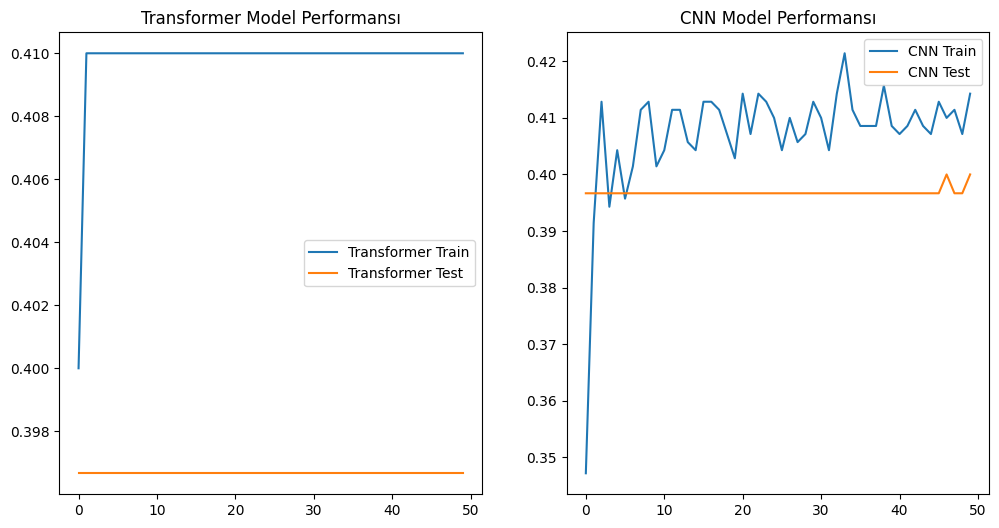

In [ ]:
# Doğruluk Grafikleri
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_transformer.history['accuracy'], label='Transformer Train')
plt.plot(history_transformer.history['val_accuracy'], label='Transformer Test')
plt.title('Transformer Model Performansı')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Test')
plt.title('CNN Model Performansı')
plt.legend()
plt.show()